<a href="https://colab.research.google.com/github/marmurr/Deep-Learning/blob/main/Deep_learning_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [99]:
import numpy as np
import matplotlib.pyplot as plt

# Useful functions

for visualization

In [100]:
def visualize(func_name, func, func_derivative):
  x_values = np.linspace(-5, 5, 100)
  func_values = func(x_values)
  func_derivative_values = func_derivative(x_values)
  plt.figure(figsize=(10, 10))
  plt.plot(x_values, func_values, label=func_name)
  plt.plot(x_values, func_derivative_values, label=func_name+" derivative")
  plt.title(func_name + ' and Derivative')
  plt.xlabel('Input')
  plt.ylabel('Output')
  plt.legend()
  plt.show()

In [101]:
def loss_visualizing_1(loss_name, loss):
  y_pred = np.linspace(0.01, 1, 100)
  y_true = np.ones(100)
  plt.plot(y_pred,  loss(y_pred, y_true))
  plt.title(loss_name)
  plt.xlabel('Predicted y')
  plt.ylabel(loss_name)

In [102]:
def loss_visualizing_2(loss_name, loss):
  y_true = np.linspace(-10, 10, 100)
  y_pred = np.zeros_like(y_true)
  plt.plot(y_true,  loss(y_pred, y_true))
  plt.title(loss_name)
  plt.xlabel('Predicted y')
  plt.grid(True)
  plt.ylabel(loss_name)

# Array generation

In [103]:
def generate_array(batch_size : int, shape : list) -> np.ndarray:
  return np.random.randint(-100, 100, size=[batch_size] + shape)


Generating test array for activation functions

In [104]:
array = generate_array(4, [2, 2])
print(array)

[[[ 73  64]
  [ 82  30]]

 [[  0  34]
  [ 82 -29]]

 [[ 19 -11]
  [ 72 -35]]

 [[ 45  88]
  [ 93  41]]]


# Activation functions

## ReLU

In [105]:
def relu(input_array : np.ndarray) -> np.ndarray:
  return np.maximum(0, input_array)

In [106]:
relu(array)

array([[[73, 64],
        [82, 30]],

       [[ 0, 34],
        [82,  0]],

       [[19,  0],
        [72,  0]],

       [[45, 88],
        [93, 41]]])

In [107]:
def relu_derivative(input_array: np.ndarray) -> np.ndarray:
    return np.where(input_array <= 0, 0, 1)

In [108]:
relu_derivative(array)

array([[[1, 1],
        [1, 1]],

       [[0, 1],
        [1, 0]],

       [[1, 0],
        [1, 0]],

       [[1, 1],
        [1, 1]]])

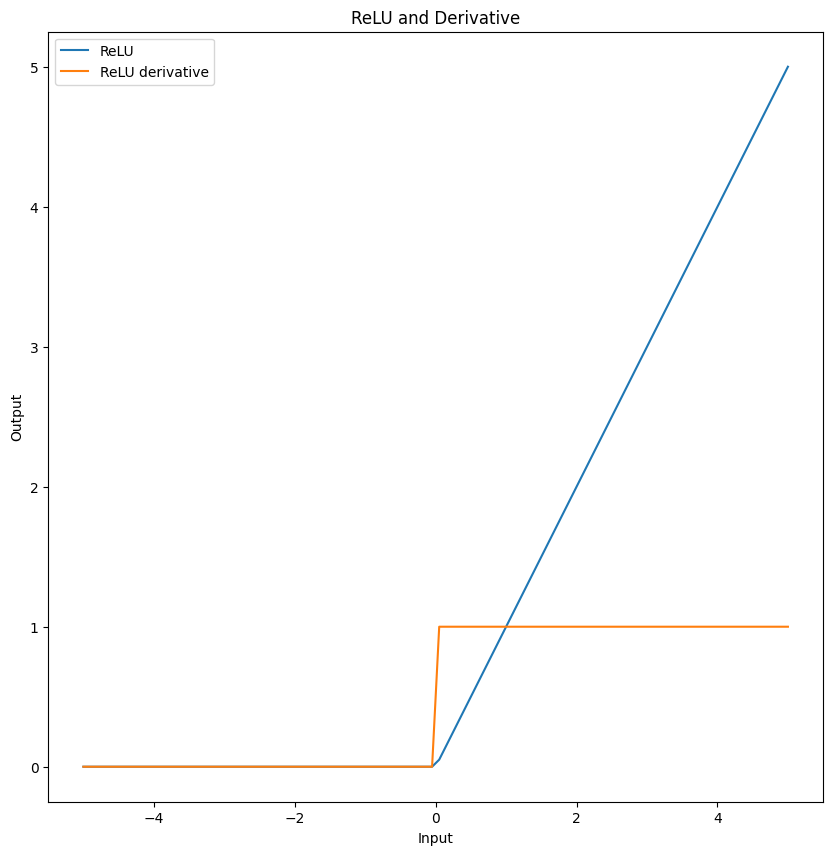

In [109]:
visualize("ReLU",relu,relu_derivative)

## ELU


In [110]:
def elu(input_array : np.ndarray, alpha=1.0) -> np.ndarray:
    return np.where(input_array > 0, input_array, alpha * (np.exp(input_array) - 1))

In [111]:
elu(array)

array([[[73.       , 64.       ],
        [82.       , 30.       ]],

       [[ 0.       , 34.       ],
        [82.       , -1.       ]],

       [[19.       , -0.9999833],
        [72.       , -1.       ]],

       [[45.       , 88.       ],
        [93.       , 41.       ]]])

In [112]:
def elu_derivative(input_array : np.ndarray, alpha=1.0) -> np.ndarray:
    return np.where(input_array > 0, 1, np.exp(input_array) * alpha)

In [113]:
elu_derivative(array)

array([[[1.00000000e+00, 1.00000000e+00],
        [1.00000000e+00, 1.00000000e+00]],

       [[1.00000000e+00, 1.00000000e+00],
        [1.00000000e+00, 2.54366565e-13]],

       [[1.00000000e+00, 1.67017008e-05],
        [1.00000000e+00, 6.30511676e-16]],

       [[1.00000000e+00, 1.00000000e+00],
        [1.00000000e+00, 1.00000000e+00]]])

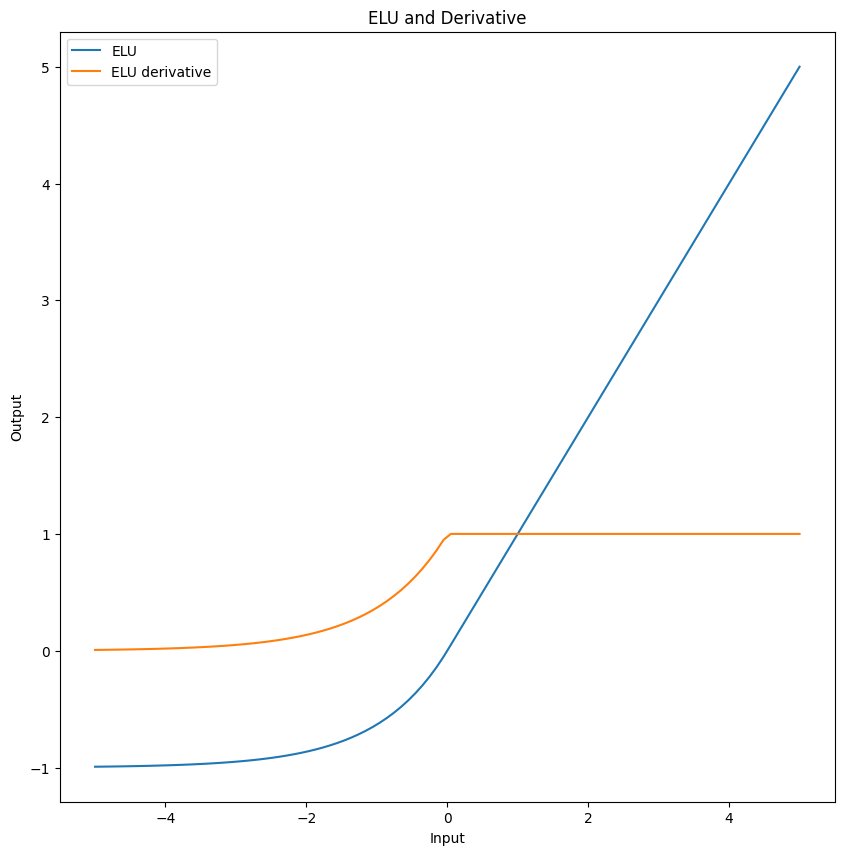

In [114]:
visualize("ELU",elu,elu_derivative)

## Swish

In [115]:
def swish(input_array : np.ndarray) -> np.ndarray:
    return input_array * (1/(1 + np.exp(-input_array)))

In [116]:
swish(array)

array([[[ 7.30000000e+01,  6.40000000e+01],
        [ 8.20000000e+01,  3.00000000e+01]],

       [[ 0.00000000e+00,  3.40000000e+01],
        [ 8.20000000e+01, -7.37663038e-12]],

       [[ 1.89999999e+01, -1.83715640e-04],
        [ 7.20000000e+01, -2.20679087e-14]],

       [[ 4.50000000e+01,  8.80000000e+01],
        [ 9.30000000e+01,  4.10000000e+01]]])

In [117]:
def swish_derivative(input_array : np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-input_array)) + input_array * (1 / (1 + np.exp(-input_array)))*(1 - (1 / (1 + np.exp(-input_array))))

In [118]:
swish_derivative(array)

array([[[ 1.00000000e+00,  1.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00]],

       [[ 5.00000000e-01,  1.00000000e+00],
        [ 1.00000000e+00, -7.12226381e-12]],

       [[ 1.00000010e+00, -1.67011150e-04],
        [ 1.00000000e+00, -2.14373970e-14]],

       [[ 1.00000000e+00,  1.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00]]])

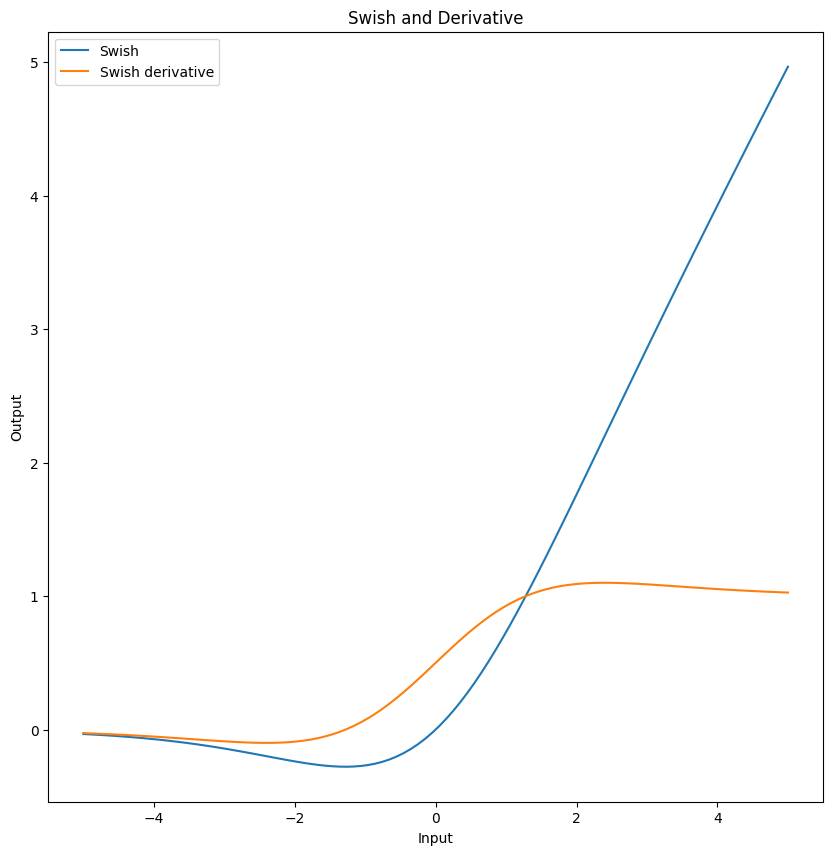

In [119]:
visualize("Swish",swish,swish_derivative)

## Softplus

In [120]:
def softplus(input_array : np.ndarray) -> np.ndarray:
    return np.log(1 + np.exp(input_array))

In [121]:
softplus(array)

array([[[7.30000000e+01, 6.40000000e+01],
        [8.20000000e+01, 3.00000000e+01]],

       [[6.93147181e-01, 3.40000000e+01],
        [8.20000000e+01, 2.54463117e-13]],

       [[1.90000000e+01, 1.67015613e-05],
        [7.20000000e+01, 6.66133815e-16]],

       [[4.50000000e+01, 8.80000000e+01],
        [9.30000000e+01, 4.10000000e+01]]])

In [122]:
def softplus_derivative(input_array : np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-input_array))

In [123]:
softplus_derivative(array)

array([[[1.00000000e+00, 1.00000000e+00],
        [1.00000000e+00, 1.00000000e+00]],

       [[5.00000000e-01, 1.00000000e+00],
        [1.00000000e+00, 2.54366565e-13]],

       [[9.99999994e-01, 1.67014218e-05],
        [1.00000000e+00, 6.30511676e-16]],

       [[1.00000000e+00, 1.00000000e+00],
        [1.00000000e+00, 1.00000000e+00]]])

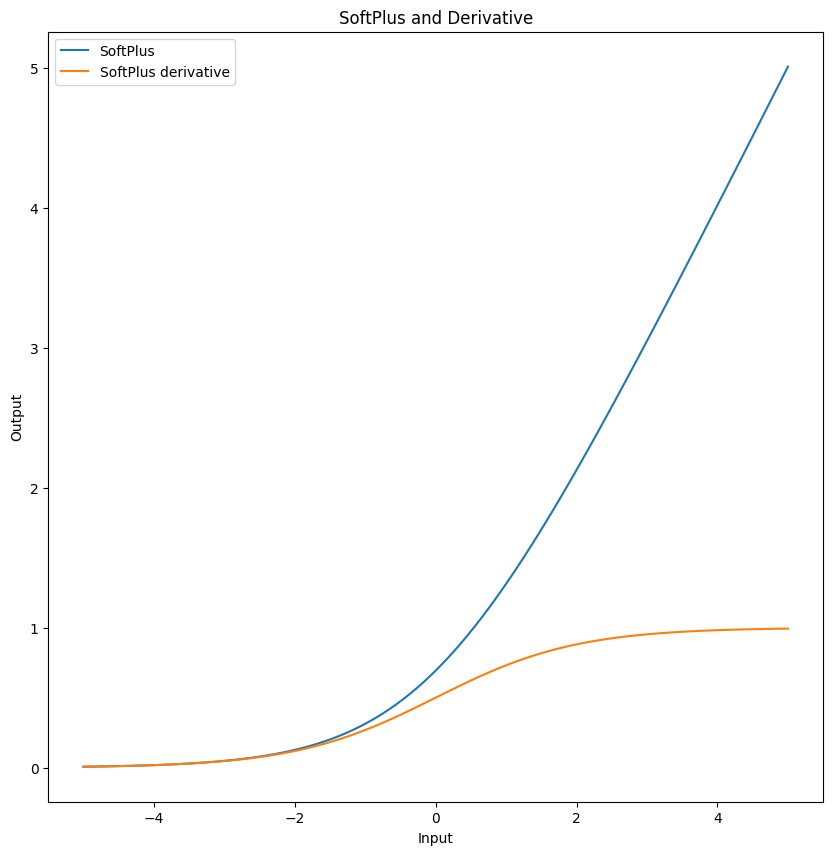

In [124]:
visualize("SoftPlus",softplus,softplus_derivative)

## Mish


In [125]:
def mish(input_array : np.ndarray) -> np.ndarray:
    return input_array * np.tanh(softplus(input_array))

In [126]:
mish(array)

array([[[ 7.30000000e+01,  6.40000000e+01],
        [ 8.20000000e+01,  3.00000000e+01]],

       [[ 0.00000000e+00,  3.40000000e+01],
        [ 8.20000000e+01, -7.37943040e-12]],

       [[ 1.90000000e+01, -1.83717174e-04],
        [ 7.20000000e+01, -2.33146835e-14]],

       [[ 4.50000000e+01,  8.80000000e+01],
        [ 9.30000000e+01,  4.10000000e+01]]])

In [127]:
def mish_derivative(input_array : np.ndarray) -> np.ndarray:
    w = 4 * (input_array + 1) + 4 * np.exp(2 * input_array) + np.exp(3 * input_array) + np.exp(input_array) * (4 * input_array + 6)
    sigma = 2 * np.exp(input_array) + np.exp(2 * input_array) + 2
    return (np.exp(input_array) * w) / (sigma ** 2)

In [128]:
mish_derivative(array)

array([[[ 1.00000000e+00,  1.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00]],

       [[ 6.00000000e-01,  1.00000000e+00],
        [ 1.00000000e+00, -7.12226381e-12]],

       [[ 1.00000000e+00, -1.67014079e-04],
        [ 1.00000000e+00, -2.14373970e-14]],

       [[ 1.00000000e+00,  1.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00]]])

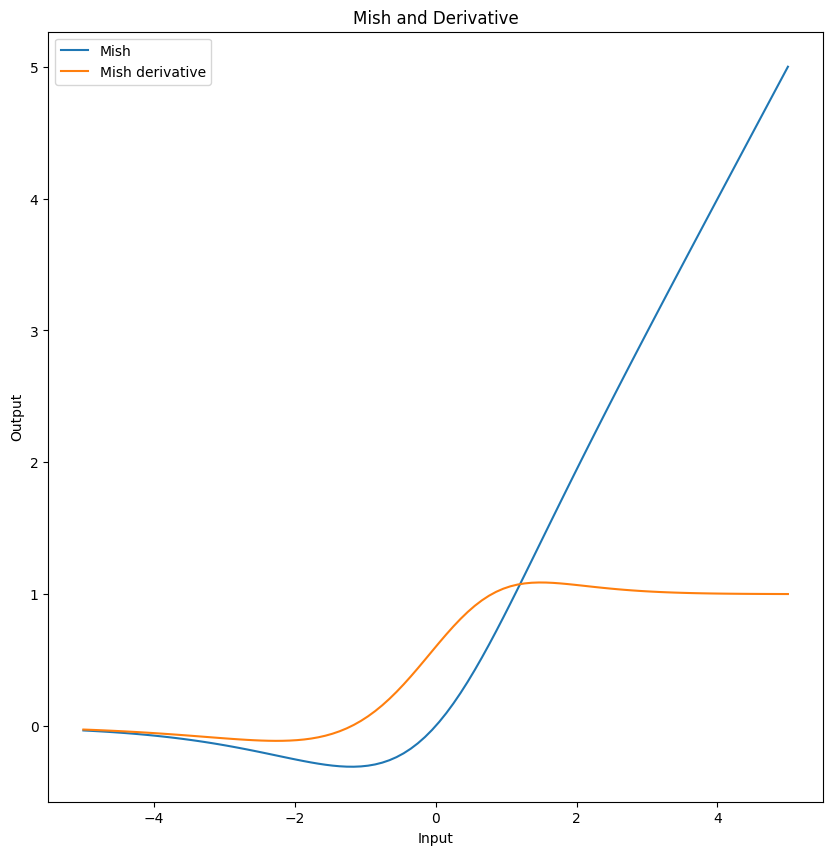

In [129]:
visualize("Mish", mish, mish_derivative)

# Loss functions

## BCE

In [130]:
def bce_loss(y_pred : array, y_true : np.array) -> np.float64:
  return -(y_true * np.log(y_pred)+(1-y_true)*np.log(1-y_pred))

In [131]:
y_pred = np.linspace(0.01, 1, 100)
y_true = np.ones(100)

<ipython-input-130-5ce0c8ceff10>:2: RuntimeWarning: divide by zero encountered in log
  return -(y_true * np.log(y_pred)+(1-y_true)*np.log(1-y_pred))
<ipython-input-130-5ce0c8ceff10>:2: RuntimeWarning: invalid value encountered in multiply
  return -(y_true * np.log(y_pred)+(1-y_true)*np.log(1-y_pred))


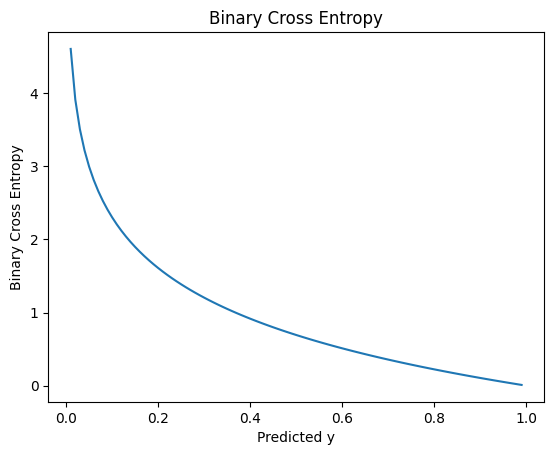

In [132]:
loss_visualizing_1('Binary Cross Entropy', bce_loss)

## Wing loss

In [133]:
def wing_loss(y_true: np.array, y_pred : np.array, w=5, epsilon=6) -> np.float64:
    diff = np.abs(y_true - y_pred)
    quadratic_loss = np.where(diff < w,
                              w * np.log(1 + diff / epsilon),
                              diff - (w - epsilon))

    return quadratic_loss

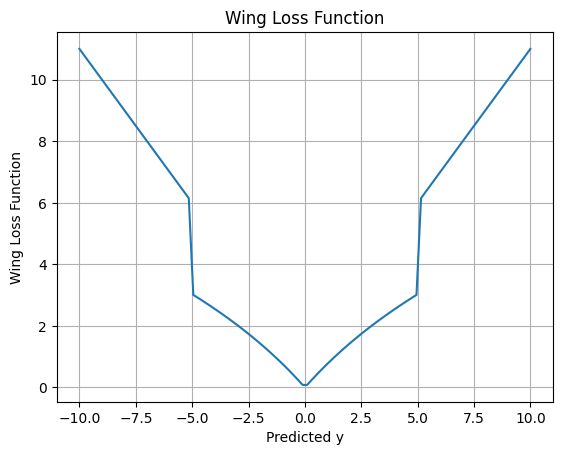

In [134]:
loss_visualizing_2('Wing Loss Function', wing_loss)

## SmoothL1


In [135]:
def smooth_l1_loss(y_true: np.array, y_pred : np.array) -> np.float64:
    diff = np.abs(y_pred - y_true)
    loss = np.where(diff < 1, 0.5 * diff**2, diff - 0.5)
    return loss

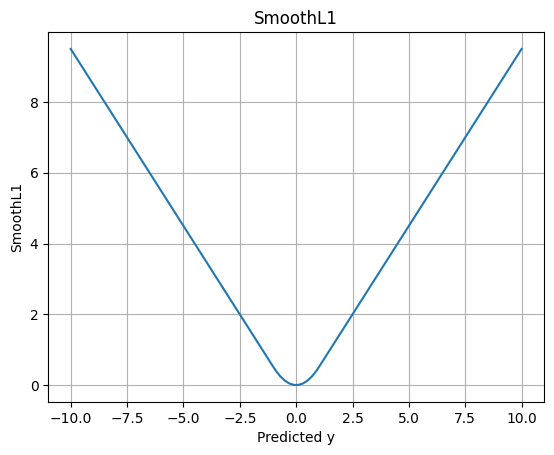

In [136]:
loss_visualizing_2('SmoothL1', smooth_l1_loss)

## Softmargin

In [137]:
def soft_margin_loss(y_true: np.array, y_pred: np.array, C=0.1) -> float:
    hinge_loss = np.maximum(0, 1 - y_true * y_pred)
    regularization_term = 0.5 * np.dot(y_pred, y_pred)
    soft_margin_loss = hinge_loss + C * regularization_term
    return soft_margin_loss

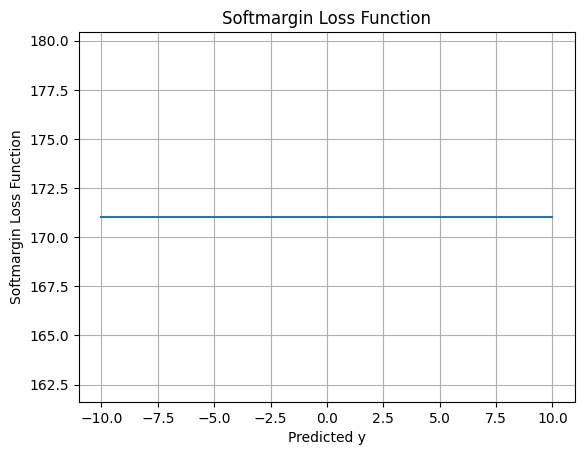

In [138]:
loss_visualizing_2('Softmargin Loss Function', soft_margin_loss)

T_T